In [23]:
import RPi.GPIO as GPIO
import time
import os
import datetime
import numpy as np
# import seaborn as sns
import pickle
# GPIO.setwarnings(False)

In [7]:
# !pip install seaborn

In [8]:
# !sudo dtoverlay w1-gpio gpiopin=6 pullup=0 # header pin 7

In [12]:
def wireless_ini():
    GPIO.cleanup()
    # set the pins numbering mode
    GPIO.setmode(GPIO.BOARD)
    # Select the GPIO pins used for the encoder K0-K3 data inputs
    GPIO.setup(11, GPIO.OUT)
    GPIO.setup(15, GPIO.OUT)
    GPIO.setup(16, GPIO.OUT)
    GPIO.setup(13, GPIO.OUT)
    # Select the signal used to select ASK/FSK
    GPIO.setup(18, GPIO.OUT)
    # Select the signal used to enable/disable the modulator
    GPIO.setup(22, GPIO.OUT)
    # Disable the modulator by setting CE pin lo
    GPIO.output (22, False)
    # Set the modulator to ASK for On Off Keying
    # by setting MODSEL pin lo
    GPIO.output (18, False)
    # Initialise K0-K3 inputs of the encoder to 0000
    GPIO.output (11, False)
    GPIO.output (15, False)
    GPIO.output (16, False)
    GPIO.output (13, False)
    
def wireless_one():
    print('turning on radiator')
    GPIO.output (11, True)
    GPIO.output (15, True)
    GPIO.output (16, True)
    GPIO.output (13, True)
    # let it settle, encoder requires this
    time.sleep(0.1)
    # Enable the modulator
    GPIO.output (22, True)
    # keep enabled for a period
    time.sleep(0.25)
    # Disable the modulator
    GPIO.output (22, False)
    GPIO.cleanup()

In [13]:
def wireless_one_off():
    print ("sending code 0111 Socket 1 off")
    GPIO.output (11, True)
    GPIO.output (15, True)
    GPIO.output (16, True)
    GPIO.output (13, False)
    # let it settle, encoder requires this
    time.sleep(0.1)
    # Enable the modulator
    GPIO.output (22, True)
    # keep enabled for a period
    time.sleep(0.25)
    # Disable the modulator
    GPIO.output (22, False)
    GPIO.cleanup()

In [14]:
wireless_ini()
wireless_one()


/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: No channels have been set up yet - nothing to clean up!  Try cleaning up at the end of your program instead!
  


turning on radiator


In [15]:
wireless_ini()
wireless_one_off()

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: No channels have been set up yet - nothing to clean up!  Try cleaning up at the end of your program instead!
  


sending code 0111 Socket 1 off


In [16]:
def temp_ini():
    GPIO.cleanup()
    GPIO.setmode(GPIO.BCM)
    GPIO.setup(21, GPIO.OUT)
    GPIO.output(21,1)

    os.system('modprobe w1-gpio')
    os.system('modprobe w1-therm')

    temp_loc = '/sys/bus/w1/devices/'
    #########
#     os.chdir(temp_loc)
#     print(os.listdir())
##############
    device = '28-0213924576ef/'
    os.chdir(temp_loc+device)
#     print(os.getcwd())
    
temp_ini()    

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: No channels have been set up yet - nothing to clean up!  Try cleaning up at the end of your program instead!
  
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: This channel is already in use, continuing anyway.  Use GPIO.setwarnings(False) to disable warnings.
  after removing the cwd from sys.path.


In [17]:
def temp_raw():
    temp_sensor = 'w1_slave'
    f=open(temp_sensor,'r')
    lines = f.readlines()
    f.close()
    return lines

def read_temp():
    temp_ini()
    lines=temp_raw()
    while lines[0].strip()[-3:]!='YES':
        time.sleep(0.2)
        lines = temp_raw()
    temp_output = lines[1].find('t=')
    if temp_output != -1:
        temp_string = lines[1].strip()[temp_output+2:]
        temp_c = float(temp_string)/1000.0
        return temp_c
    

In [18]:
# temp_ini()
read_temp()

20.25

In [ ]:
temps = []
trigger_block = False
block_time = datetime.datetime.now().time() #ini
t = datetime.datetime.now().time()
print('entering loop')
while True:
    t = datetime.datetime.now().time()
    curr = read_temp()
    print(t, curr)
    temps = temps + [(t,curr)]
    
    if (curr <= 17.0)  & (t.hour < 9) & (trigger_block == False):
        trigger_block = True  
        wireless_ini()
        wireless_one()
    elif (curr>17.5)& (trigger_block == True):
        wireless_ini()
        wireless_one_off()
        trigger_block = False
    
    time.sleep(60)

entering loop
01:24:18.365879 17.625


In [115]:
temps

[(datetime.time(1, 24, 18, 365879), 17.625),
 (datetime.time(1, 25, 19, 380775), 17.625),
 (datetime.time(1, 26, 20, 412834), 17.5),
 (datetime.time(1, 27, 21, 433903), 17.687),
 (datetime.time(1, 28, 22, 492833), 17.562),
 (datetime.time(1, 29, 23, 532724), 17.5),
 (datetime.time(1, 30, 24, 572772), 17.562),
 (datetime.time(1, 31, 25, 612842), 17.5),
 (datetime.time(1, 32, 26, 652808), 17.437),
 (datetime.time(1, 33, 27, 699204), 17.687),
 (datetime.time(1, 34, 28, 732864), 17.562),
 (datetime.time(1, 35, 29, 753922), 17.625),
 (datetime.time(1, 36, 30, 812721), 17.5),
 (datetime.time(1, 37, 31, 833916), 17.437),
 (datetime.time(1, 38, 32, 898144), 17.625),
 (datetime.time(1, 39, 33, 932857), 17.5),
 (datetime.time(1, 40, 34, 972730), 17.5),
 (datetime.time(1, 41, 36, 12836), 17.562),
 (datetime.time(1, 42, 37, 52654), 17.437),
 (datetime.time(1, 43, 38, 73929), 17.5),
 (datetime.time(1, 44, 39, 132859), 17.562),
 (datetime.time(1, 45, 40, 143898), 17.5),
 (datetime.time(1, 46, 41, 21

In [21]:
t.hour

1

In [27]:
temps = []

In [29]:
temps = temps + [1]

In [30]:
temps

[1]

In [67]:
import matplotlib.pyplot as plt 

In [116]:
te = [i[1] for i in temps]

In [72]:
ti = [i[0] for i in temps]

In [76]:
import matplotlib.dates as dates

In [92]:
my_day = datetime.date(2019, 1, 5)
x_dt = [ dates.date2num(datetime.datetime.combine(my_day, t)) for t in ti ]

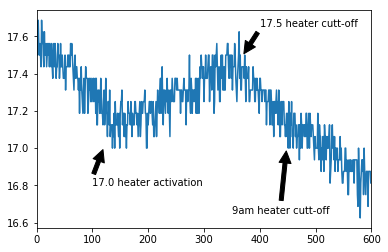

In [134]:
plt.plot(te)
plt.annotate('17.0 heater activation',xy = (120,17), xytext = (100, 16.8),arrowprops=dict(facecolor='black', shrink=0.05))
plt.annotate('17.5 heater cutt-off',xy = (370,17.5), xytext = (400, 17.65),arrowprops=dict(facecolor='black', shrink=0.05))
plt.annotate('9am heater cutt-off',xy = (448,17.0), xytext = (350, 16.65),arrowprops=dict(facecolor='black', shrink=0.05))
plt.xlim(0,600)
plt.show()

In [132]:
temps[600]

(datetime.time(11, 34, 39, 533068), 16.875)

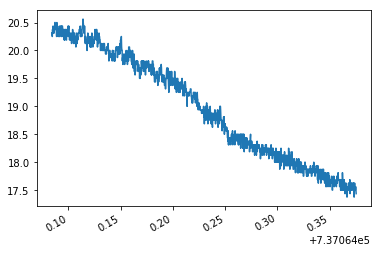

In [97]:
plt.plot(x_dt, te)
plt.gcf().autofmt_xdate()
plt.show()

In [96]:
x_dt

[737064.0843145447,
 737064.0845570872,
 737064.0847996824,
 737064.0850422753,
 737064.085284867,
 737064.0855274607,
 737064.085770052,
 737064.0860126461,
 737064.0862552399,
 737064.0864978321,
 737064.0867404254,
 737064.0869830169,
 737064.0872256097,
 737064.0874682033,
 737064.0877107951,
 737064.0879533873,
 737064.0881959811,
 737064.0884385728,
 737064.088681165,
 737064.0889238205,
 737064.0891664139,
 737064.0894090055,
 737064.0896515991,
 737064.0898942304,
 737064.0901367845,
 737064.0903793484,
 737064.090621966,
 737064.0908644975,
 737064.0911070906,
 737064.0913496831,
 737064.091592276,
 737064.0918348678,
 737064.0920774617,
 737064.0923200542,
 737064.0925626467,
 737064.0928052386,
 737064.0930478309,
 737064.0932904243,
 737064.0935330169,
 737064.0937756107,
 737064.0940182041,
 737064.0942608567,
 737064.0945033878,
 737064.0947459807,
 737064.0949885729,
 737064.0952312304,
 737064.0954737581,
 737064.0957163513,
 737064.09595901,
 737064.0962024615,
 737064

In [110]:
# !sudo touch 190104to05temp_data.pkl

# pickle.dump(temps,open('190104to05temp_data.pkl', 'wb'))

PermissionError: [Errno 13] Permission denied: '190104to05temp_data.pkl'

In [25]:
from flask import Flask

from flask_ask import Ask, statement, convert_errors

import RPi.GPIO as GPIO

import logging

import serial

import time

In [26]:
app = Flask(__name__)

ask = Ask(app, '/')

logging.getLogger("flask_ask").setLevel(logging.DEBUG)

@ask.intent('temperature')

def temperature():
    x = 20
#   x = 'The temperature is %d'%read_temp()

  return statement(x)


app.run(debug=True)

OSError: [Errno 98] Address already in use

In [21]:
x = 'The temperature is %d'%read_temp()
x

'The temperature is 20'